#### Import Libs

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import DataCleainingFunctions as dc
import missingno as ms


### Notebook Options

In [162]:
# Set table to show all columns
pd.set_option('display.max_columns', None)

# Set charts size
sns.set_theme(rc={'figure.figsize':(13.7,8.27)})

### Dataset Imports

In [163]:
# Read train dataset 
df = pd.read_csv('CSV\Regularities_by_liaisons_Trains_France.csv')

In [164]:
df.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Comment (optional) delays on arrival,"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,NaN,41.0,22.924797,5.233333,NaN,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,NaN,47.0,27.085106,6.123967,NaN,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,NaN,91.0,18.440659,4.430194,"Ce mois ci, la destination a été marquée par l...",0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,NaN,15.0,20.618889,3.812135,NaN,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,NaN,73.0,19.608447,4.176208,NaN,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


#### Buisness Case

- Purpose: to analyze train delays in France
- Stakeholder: a railroad manager who needs to identify the reasons for delays on selected rail lines

1. We need only data with delayes or train cancelation
2. 

#### ToDo

1. Zamiana kolumny month na int64
2. Usuniecie niepotrzebnych kolumn
3. Sprawdzenie NaN
4. Suma Number of late dep + Number of late arr
5. Outlinersy
6. HeatMap
7. Korelacje
8. Stworzenie kategorii opozniej 'small', 'medium', 'high', 'very high'

In [165]:
# Check main informations about dataset
dc.stats(df)

### Shape ###
Rows: 7806
Columns: 32


### Data Types ###
Year                                                                                                                     int64
Month                                                                                                                  float64
Departure station                                                                                                       object
Arrival station                                                                                                         object
Average travel time (min)                                                                                              float64
Number of expected circulations                                                                                        float64
Number of cancelled trains                                                                                             float64
Number of late trains at departure                   

In [166]:
# Information about missing values, only values bigger than 0
dc.miss_dupl(df)



### Missing Values ###
Average travel time (min)                                                                                                63
Number of expected circulations                                                                                          63
Average delay of all departing trains (min)                                                                              63
Comment (optional) delays at departure                                                                                 7806
Number of trains late on arrival                                                                                        100
Average delay of late arriving trains (min)                                                                             101
Average delay of all arriving trains (min)                                                                               63
Comment (optional) delays on arrival                                                                       

In [167]:
# Numeric information about columns
df.describe()

,Year,Month,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
count,7806.000000,7806.000000,7743.000000,7743.000000,7806.000000,7806.000000,7806.000000,7743.000000,0.0,7706.000000,7705.000000,7743.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7738.000000,7699.000000,7738.000000,7738.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000
mean,2017.345119,6.216372,166.759261,266.510913,7.911478,63.519088,14.744145,2.956191,NaN,36.019595,32.737533,5.212800,0.267085,0.255042,0.191950,0.181099,0.067688,0.036435,24.545231,29.379555,11.055441,4.000129,26.708546,25.504166,19.195005,18.109877,6.768831,3.643517
std,1.596611,3.440601,80.737092,157.456548,20.997806,78.822324,13.373758,5.951154,NaN,29.210396,14.009948,8.397351,0.162804,0.160101,0.148808,0.132821,0.078780,0.057827,20.323532,18.929319,9.921009,4.459822,16.280439,16.010052,14.880847,13.282123,7.877975,5.782651
min,2015.000000,1.000000,35.888889,1.000000,0.000000,0.000000,0.000000,-229.269444,NaN,0.000000,-40.109259,-472.638889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-118.022363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,3.000000,100.643605,163.000000,0.000000,12.000000,7.559617,1.007765,NaN,16.000000,23.809420,2.829885,0.156250,0.150000,0.086957,0.092593,0.000000,0.000000,10.000000,9.177749,4.000000,1.000000,15.625000,15.000000,8.695652,9.259259,0.000000,0.000000
50%,2017.000000,6.000000,162.178808,227.000000,1.000000,33.000000,13.535727,2.014571,NaN,28.000000,30.875000,4.680056,0.250000,0.235294,0.171429,0.161290,0.050000,0.017544,19.000000,32.022500,8.000000,3.000000,25.000000,23.529412,17.142857,16.129032,5.000000,1.754386
75%,2019.000000,9.000000,207.885957,352.000000,6.000000,84.000000,18.713366,3.691398,NaN,48.000000,39.124653,7.278924,0.357143,0.333333,0.269231,0.250000,0.100000,0.055556,33.000000,41.313095,15.000000,6.000000,35.714286,33.333333,26.923077,25.000000,10.000000,5.555556
max,2020.000000,12.000000,786.500000,960.000000,279.000000,591.000000,316.188095,173.571429,NaN,235.000000,258.000000,83.388889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,192.000000,258.000000,91.000000,37.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


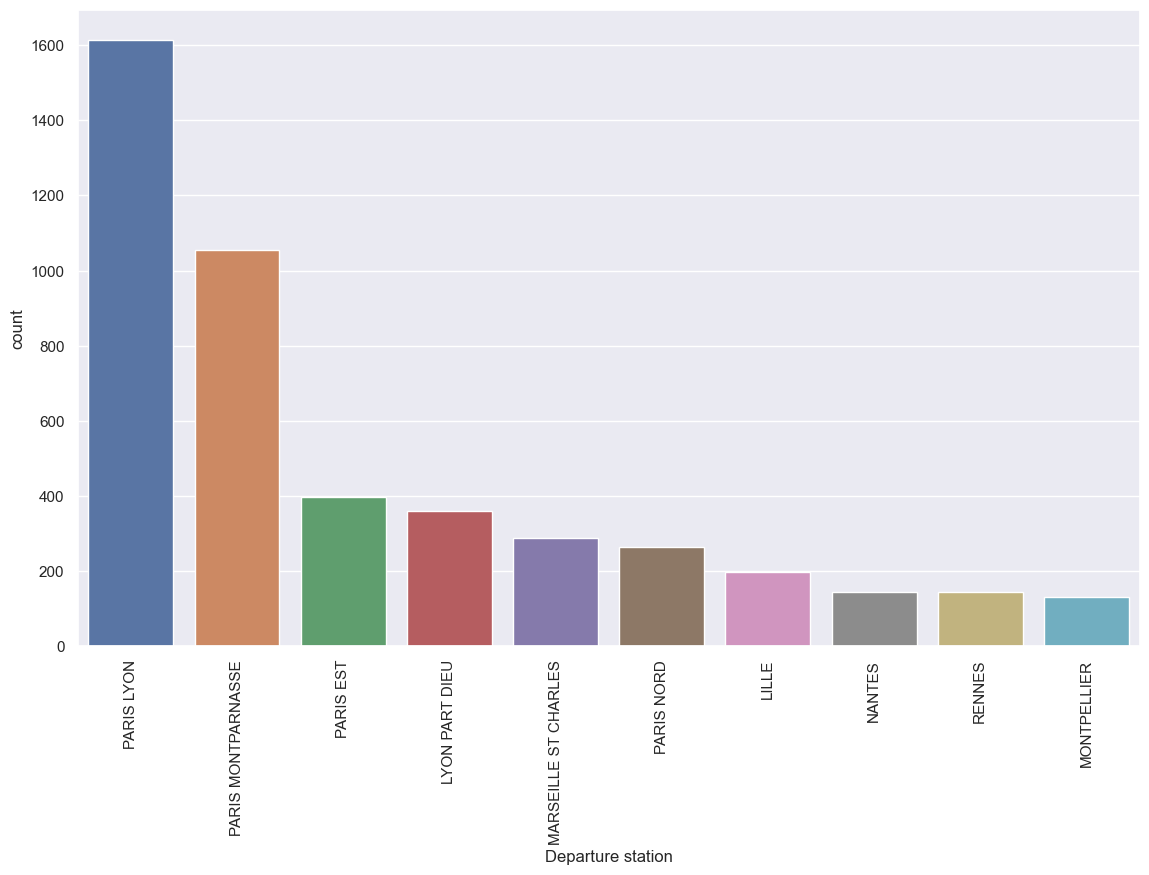

In [168]:
# Chart with top 10 Departure stations
sns.countplot(data = df, x = "Departure station", order = df['Departure station'].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

In [169]:
# Freq for averege delay of departing trains
df['Average delay of all departing trains (min)'].value_counts()

Average delay of all departing trains (min)
0.000000    8
1.000000    7
1.366667    5
0.400000    4
0.250000    4
           ..
0.932124    1
3.640326    1
7.249435    1
0.575194    1
2.055769    1
Name: count, Length: 7575, dtype: int64

In [170]:
# Freq for averege delay of arriving trains
df['Average delay of all arriving trains (min)'].value_counts()

Average delay of all arriving trains (min)
 3.000000    6
 4.000000    4
 2.666667    4
 6.000000    3
 3.200000    3
            ..
 4.345986    1
 2.410344    1
 3.260750    1
 3.341613    1
-0.457051    1
Name: count, Length: 7619, dtype: int64

In [171]:
# Conditions for only trains with delay above 0 mins
arr = df['Average delay of all arriving trains (min)'] > 0
dep = df['Average delay of all departing trains (min)'] > 0

In [172]:
# Filtering data set according to conditions
df = df[arr & dep]

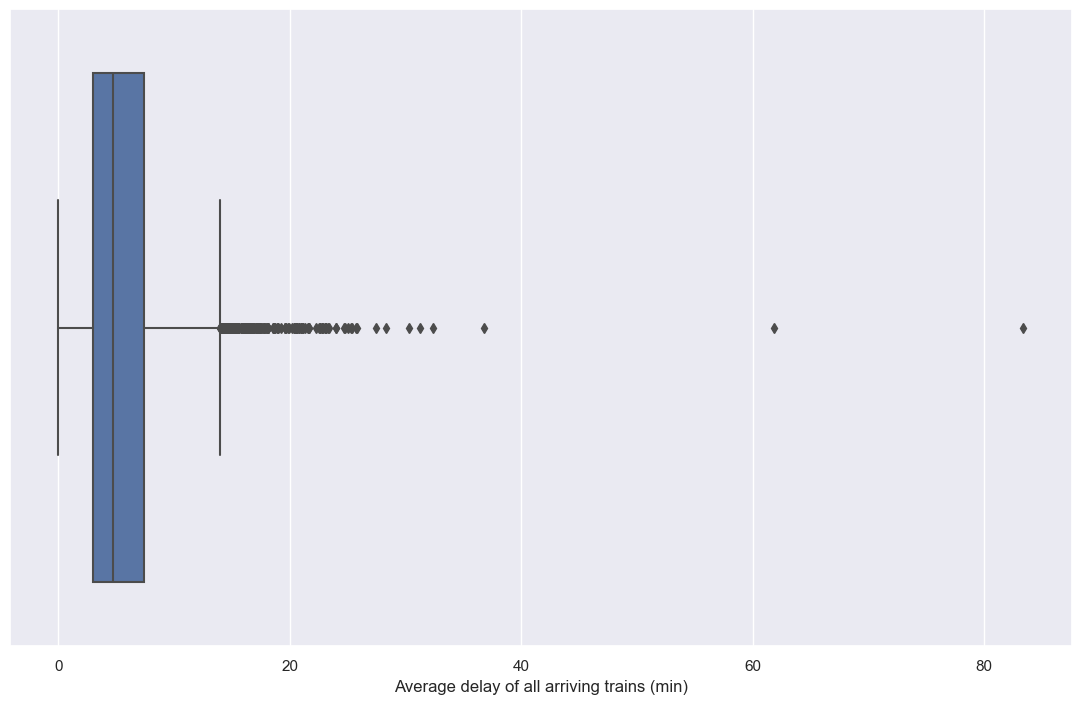

In [173]:
# Chart showing distributions for all arrving trains delays
sns.boxplot(data= df, x = 'Average delay of all arriving trains (min)')
plt.show()

In [174]:
# Top 10 Arrival stations in dataset
df['Arrival station'].value_counts().head(10)

Arrival station
PARIS LYON              1533
PARIS MONTPARNASSE      1031
PARIS EST                368
LYON PART DIEU           353
MARSEILLE ST CHARLES     256
PARIS NORD               238
LILLE                    190
RENNES                   140
NANTES                   137
STRASBOURG               128
Name: count, dtype: int64

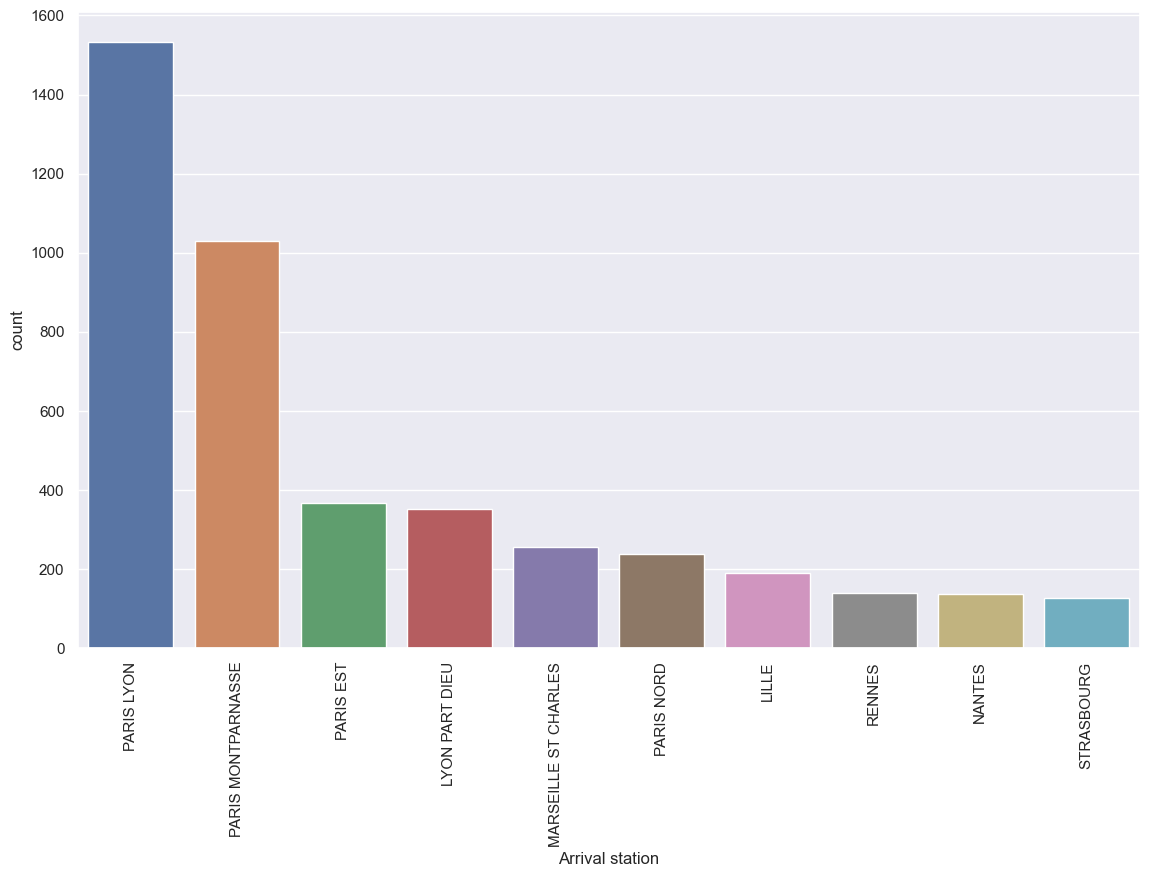

In [175]:
# Chart with top 10 Arrival stations
sns.countplot(data = df, x = "Arrival station", order = df['Arrival station'].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

#### TOP 10 Departure Stations

In [176]:
# Top 10 Departure stations
top_10_dep_stations = df['Departure station'].value_counts().head(10).index
top_10_dep_stations

Index(['PARIS LYON', 'PARIS MONTPARNASSE', 'PARIS EST', 'LYON PART DIEU',
       'MARSEILLE ST CHARLES', 'PARIS NORD', 'LILLE', 'NANTES', 'RENNES',
       'MONTPELLIER'],
      dtype='object', name='Departure station')

In [177]:
top_10 = round((len(df[df['Departure station'].isin(top_10_dep_stations)]) / len(df) ) * 100, 2)

In [178]:
print(f'Top 10 Departure Station is {top_10} % of whole dataset.')

Top 10 Departure Station is 59.37 % of whole dataset.


### Data Cleaning

In [179]:
# Copy of dataset
df_clean = df.copy()

In [180]:
# Save dataset to new CSV file
df_clean.to_csv('CSV\Clean_DataSet_Trains.csv')

#### Column Drops

##### Droping columns with 0 information for anylysis

In [181]:
# Drop non need columns
df_clean.drop(columns= ['Comment (optional) delays at departure', 'Comment (optional) delays on arrival'], inplace= True)

In [182]:
df_clean.columns

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
       '% trains late due to railway infrastructure (maintenance, works)',
       '% trains late due to traffic management (rail line traffic, network interactions)',
       '% trains late due to rolling stock',
       '% trains late due to station management and reuse of material',
       '% trains late due to passenger traffic (affluence, PSH management, connections)',
       'Number of late trains >

#### Check how much missing values in % are for each columns

In [183]:
# Chcking missing values for each columns in %
missing_values = (df_clean.isna().sum() / len(df_clean))* 100
missing_values

Year                                                                                                                   0.000000
Month                                                                                                                  0.000000
Departure station                                                                                                      0.000000
Arrival station                                                                                                        0.000000
Average travel time (min)                                                                                              0.000000
Number of expected circulations                                                                                        0.000000
Number of cancelled trains                                                                                             0.000000
Number of late trains at departure                                                                      

<Axes: >

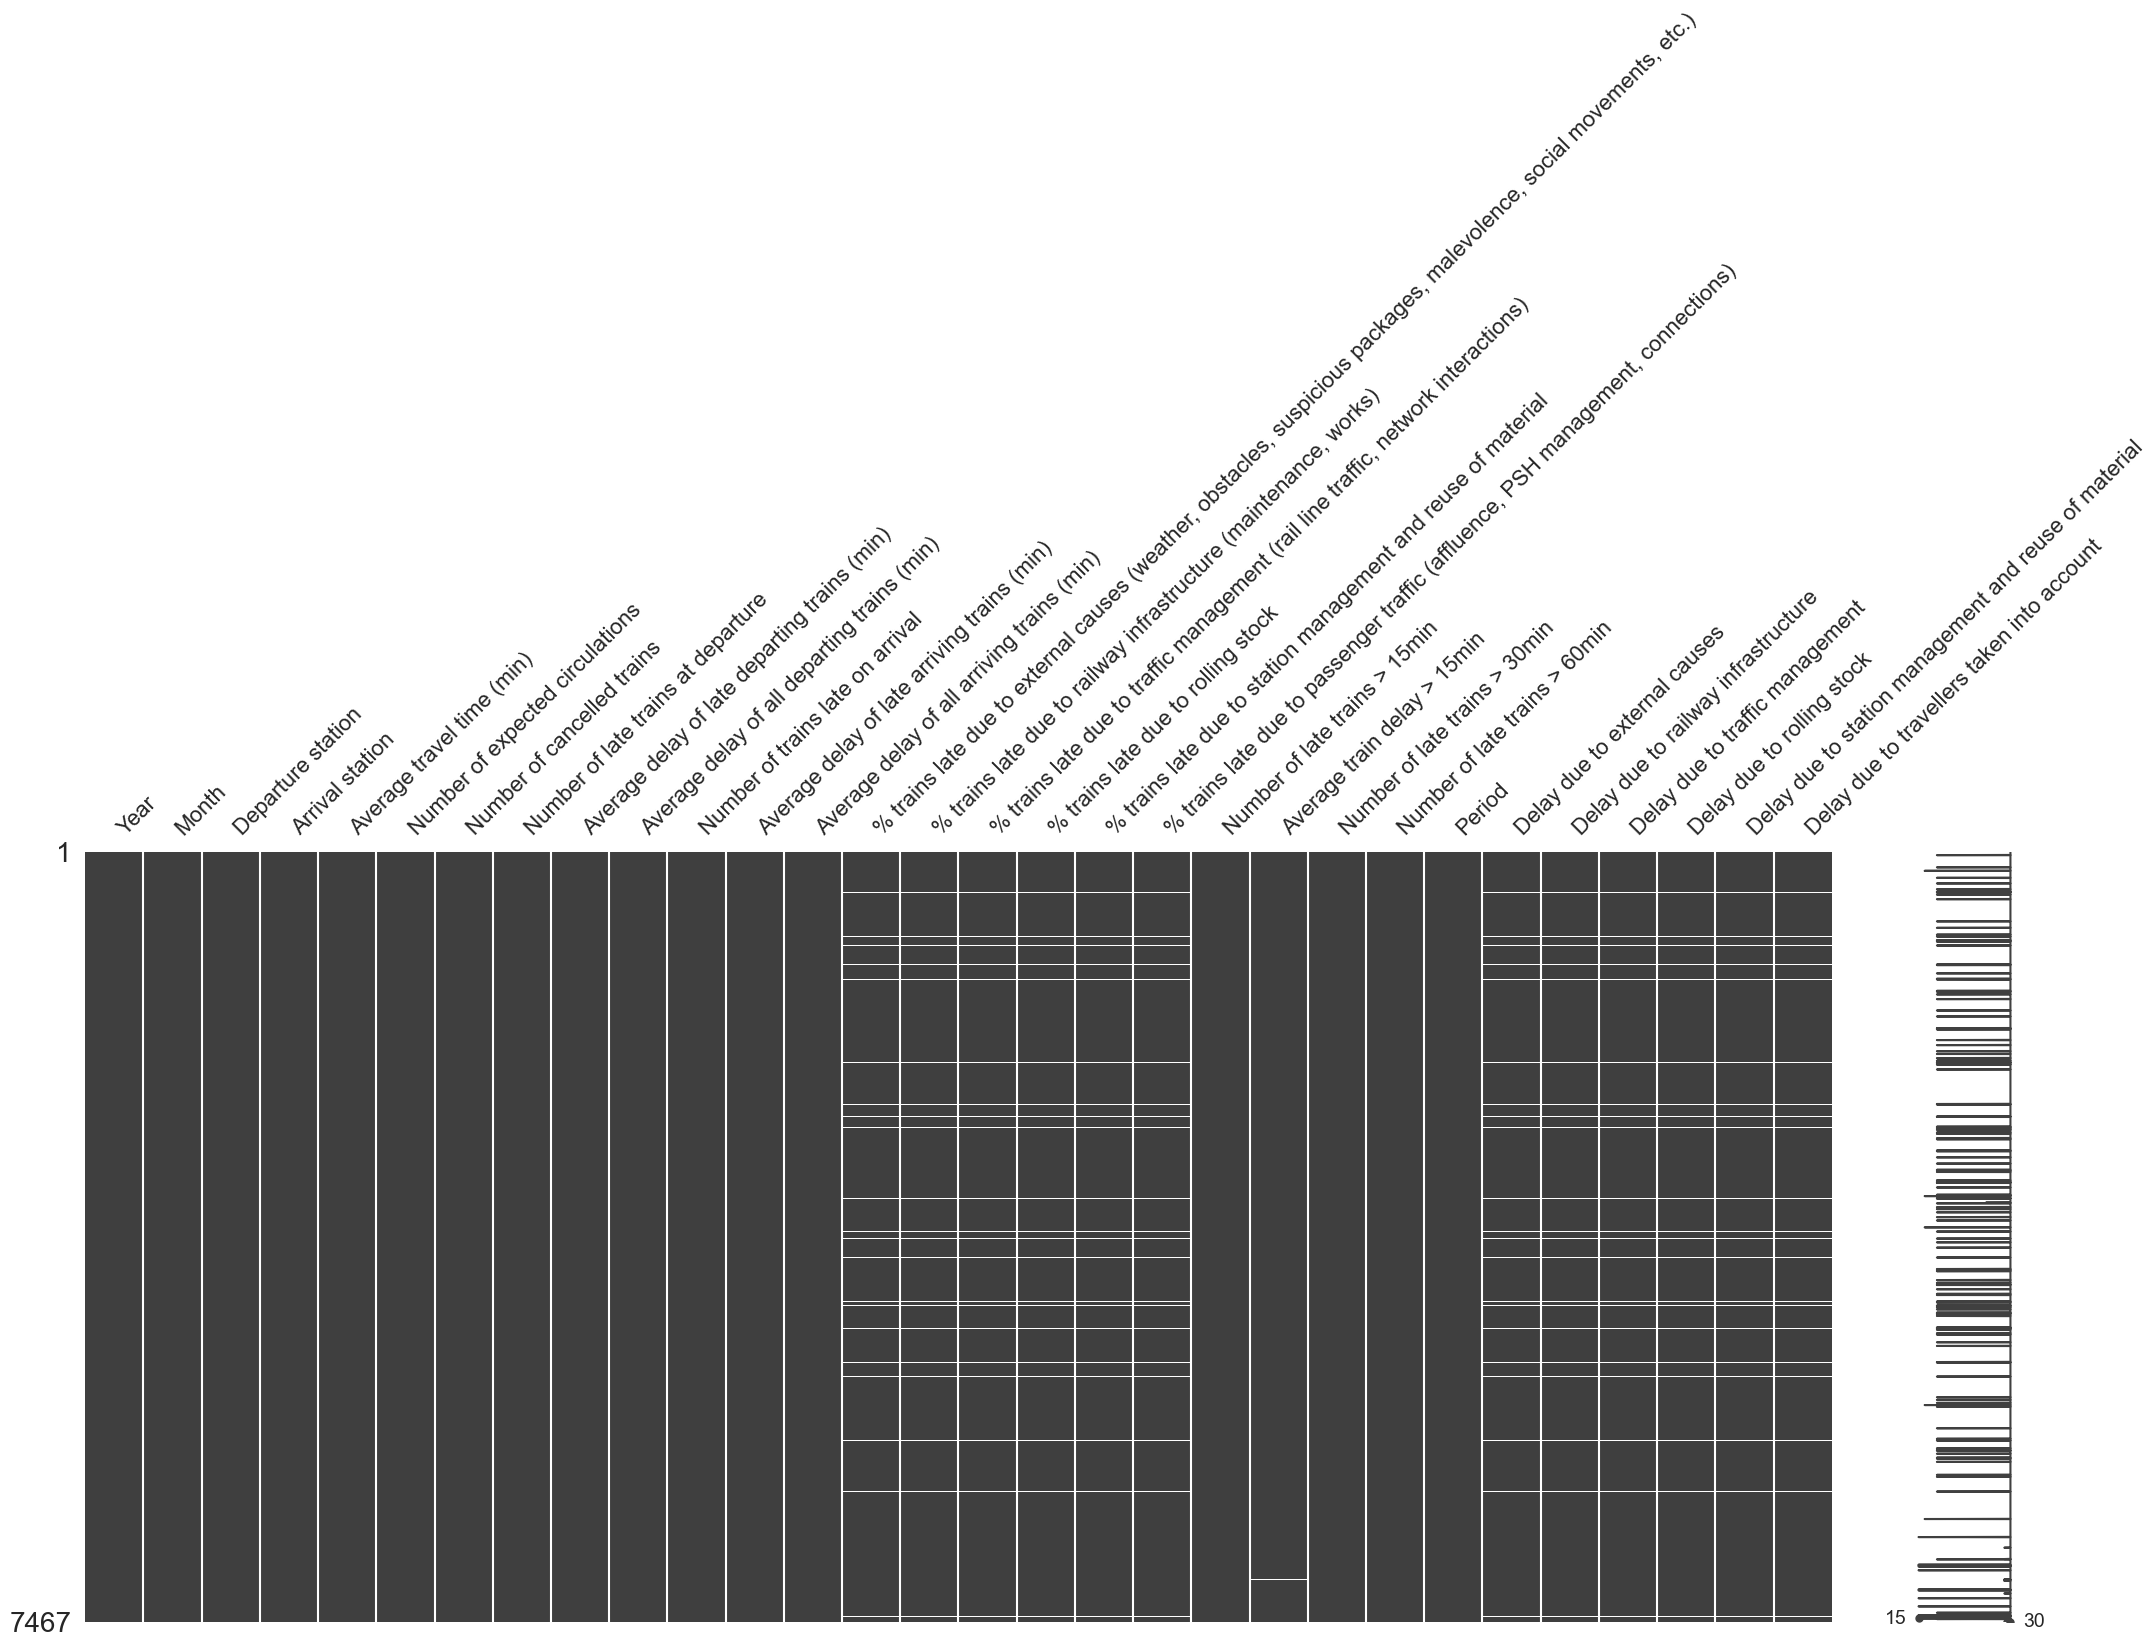

In [184]:
# Visualization of missing values
ms.matrix(df_clean)

#### Droping missing values from columns with less than 5% missing values

In [185]:
# Drop missing values below 5%
col_to_drop = dc.drop_missing_five(df_clean)
df_clean.dropna(subset = col_to_drop, inplace = True)

In [186]:
df_clean.isna().sum()

Year                                                                                                                   0
Month                                                                                                                  0
Departure station                                                                                                      0
Arrival station                                                                                                        0
Average travel time (min)                                                                                              0
Number of expected circulations                                                                                        0
Number of cancelled trains                                                                                             0
Number of late trains at departure                                                                                     0
Average delay of late departing 

<Axes: >

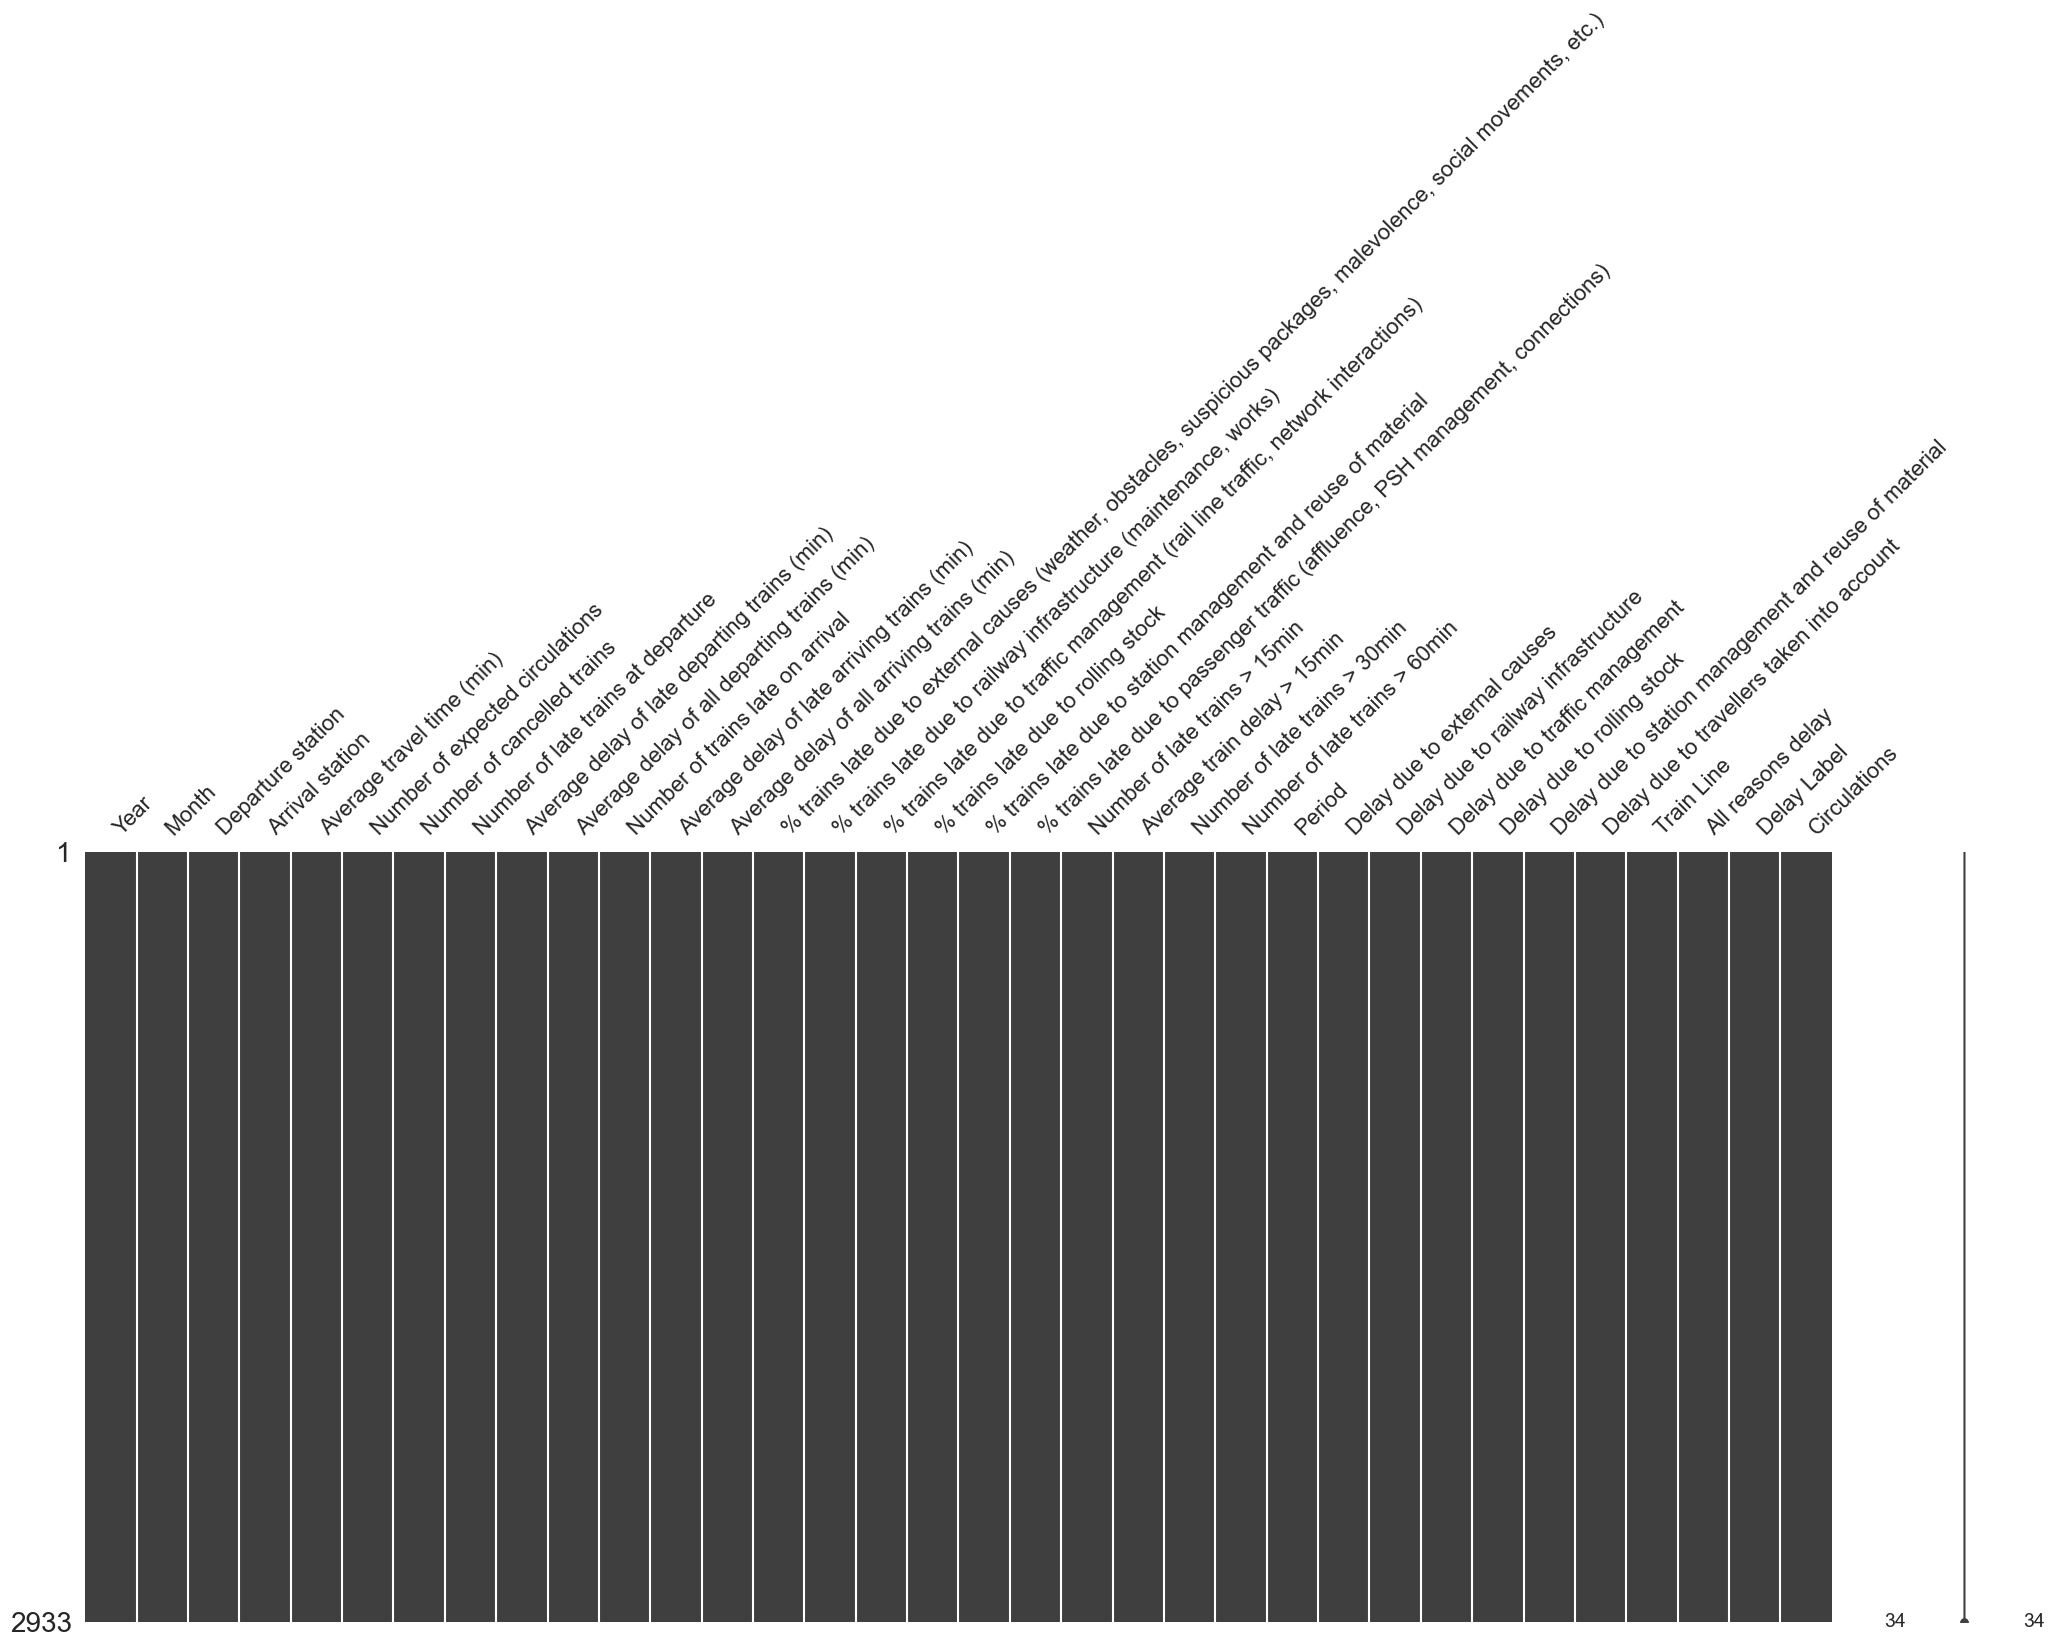

In [241]:
# Visualization of missing values
ms.matrix(df_clean)

In [187]:
df_clean.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,41.0,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,47.0,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,91.0,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,15.0,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,73.0,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


In [188]:
df_clean.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       7793, 7794, 7795, 7796, 7798, 7799, 7800, 7801, 7802, 7803],
      dtype='int64', length=7278)

#### Update column data types

In [189]:
dc.columns_bsize(df_clean)

['Year --- 58224 --- int64',
 'Month --- 58224 --- float64',
 'Departure station --- 58224 --- object',
 'Arrival station --- 58224 --- object',
 'Average travel time (min) --- 58224 --- float64',
 'Number of expected circulations --- 58224 --- float64',
 'Number of cancelled trains --- 58224 --- float64',
 'Number of late trains at departure --- 58224 --- float64',
 'Average delay of late departing trains (min) --- 58224 --- float64',
 'Average delay of all departing trains (min) --- 58224 --- float64',
 'Number of trains late on arrival --- 58224 --- float64',
 'Average delay of late arriving trains (min) --- 58224 --- float64',
 'Average delay of all arriving trains (min) --- 58224 --- float64',
 '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.) --- 58224 --- float64',
 '% trains late due to railway infrastructure (maintenance, works) --- 58224 --- float64',
 '% trains late due to traffic management (rail line traffi

In [190]:
df_clean.describe()

,Year,Month,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
count,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000
mean,2017.327288,6.222176,166.718681,272.930475,8.093844,66.639049,14.973812,3.129764,37.071723,32.981337,5.593329,0.267714,0.254574,0.191497,0.181361,0.067660,0.036468,25.422506,29.653779,11.452047,4.162819,26.771449,25.457351,19.149740,18.136108,6.766044,3.646776
std,1.572769,3.475107,80.460889,157.060081,21.561035,80.047970,13.199614,4.879940,29.428234,13.625678,3.806875,0.161047,0.157409,0.146175,0.129863,0.076726,0.055953,20.401824,18.727495,9.947041,4.508402,16.104727,15.740855,14.617488,12.986280,7.672600,5.595285
min,2015.000000,1.000000,45.956731,4.000000,0.000000,0.000000,0.000000,0.009076,1.000000,8.118182,0.007026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,3.000000,100.501149,171.000000,0.000000,14.000000,7.895739,1.090609,17.000000,24.167117,2.965188,0.157895,0.150574,0.088235,0.095238,0.000000,0.000000,11.000000,9.322218,5.000000,1.000000,15.789474,15.057446,8.823529,9.523810,0.000000,0.000000
50%,2017.000000,6.000000,162.000456,232.000000,1.000000,36.000000,13.710257,2.119575,29.000000,31.089749,4.786579,0.250000,0.235294,0.172144,0.162278,0.051282,0.018868,20.000000,32.387881,9.000000,3.000000,25.000000,23.529412,17.214440,16.227766,5.128205,1.886792
75%,2019.000000,9.000000,208.792932,372.000000,6.000000,89.000000,18.872491,3.803831,49.000000,39.413286,7.391633,0.357143,0.333333,0.269231,0.250000,0.100000,0.055556,34.000000,41.569687,15.000000,6.000000,35.714286,33.333333,26.923077,25.000000,10.000000,5.555556
max,2020.000000,12.000000,492.545455,960.000000,279.000000,591.000000,316.188095,173.571429,235.000000,258.000000,83.388889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,192.000000,258.000000,91.000000,37.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [191]:
df_clean.select_dtypes(include= 'float')

,Month,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,7.0,131.914980,247.0,0.0,191.0,3.576353,2.678273,41.0,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,7.0,175.611570,242.0,0.0,178.0,9.780805,7.033609,47.0,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,7.0,62.395349,435.0,5.0,391.0,3.896974,3.529341,91.0,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,7.0,172.421053,114.0,0.0,101.0,1.950990,1.685673,15.0,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,7.0,67.310000,404.0,4.0,284.0,8.379108,5.803125,73.0,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,5.0,193.436620,87.0,16.0,62.0,4.632527,4.026291,4.0,21.483333,3.508451,0.000000,0.500000,0.000000,0.250000,0.250000,0.000000,5.0,36.320833,3.0,0.0,0.000000,50.000000,0.000000,25.000000,25.000000,0.000000
7800,5.0,188.161074,166.0,17.0,128.0,2.875781,2.434340,6.0,28.358333,0.310738,0.500000,0.166667,0.166667,0.000000,0.166667,0.000000,6.0,28.358333,3.0,0.0,50.000000,16.666667,16.666667,0.000000,16.666667,0.000000
7801,5.0,162.702381,191.0,23.0,50.0,5.359667,1.201190,11.0,37.110606,2.020933,0.272727,0.181818,0.090909,0.363636,0.090909,0.000000,8.0,46.264583,4.0,1.0,27.272727,18.181818,9.090909,36.363636,9.090909,0.000000
7802,5.0,197.241206,227.0,28.0,54.0,5.702160,1.125963,10.0,49.050000,3.657203,0.300000,0.300000,0.100000,0.300000,0.000000,0.000000,10.0,49.050000,6.0,1.0,30.000000,30.000000,10.000000,30.000000,0.000000,0.000000


In [192]:
to_int = ['Year', 'Month', 'Number of expected circulations', 'Number of cancelled trains', 'Number of late trains at departure',
           'Number of trains late on arrival', 'Number of late trains > 15min', 'Number of late trains > 30min',
           'Number of late trains > 60min']

In [193]:
dc.change_to_int(df_clean, to_int)

In [194]:
dc.columns_bsize(df_clean)

['Year --- 14556 --- int16',
 'Month --- 14556 --- int16',
 'Departure station --- 58224 --- object',
 'Arrival station --- 58224 --- object',
 'Average travel time (min) --- 58224 --- float64',
 'Number of expected circulations --- 14556 --- int16',
 'Number of cancelled trains --- 14556 --- int16',
 'Number of late trains at departure --- 14556 --- int16',
 'Average delay of late departing trains (min) --- 58224 --- float64',
 'Average delay of all departing trains (min) --- 58224 --- float64',
 'Number of trains late on arrival --- 14556 --- int16',
 'Average delay of late arriving trains (min) --- 58224 --- float64',
 'Average delay of all arriving trains (min) --- 58224 --- float64',
 '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.) --- 58224 --- float64',
 '% trains late due to railway infrastructure (maintenance, works) --- 58224 --- float64',
 '% trains late due to traffic management (rail line traffic, network

In [195]:
df_clean.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7,ANGOULEME,PARIS MONTPARNASSE,131.914980,247,0,191,3.576353,2.678273,41,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21,32.965873,7,2,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242,0,178,9.780805,7.033609,47,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35,32.057143,14,2,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7,LE MANS,PARIS MONTPARNASSE,62.395349,435,5,391,3.896974,3.529341,91,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30,42.367241,13,4,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7,ST MALO,PARIS MONTPARNASSE,172.421053,114,0,101,1.950990,1.685673,15,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8,27.620833,2,0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404,4,284,8.379108,5.803125,73,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28,37.658333,12,3,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


In [196]:
df_clean.to_csv('CSV\Clean_DataSet_Trains.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

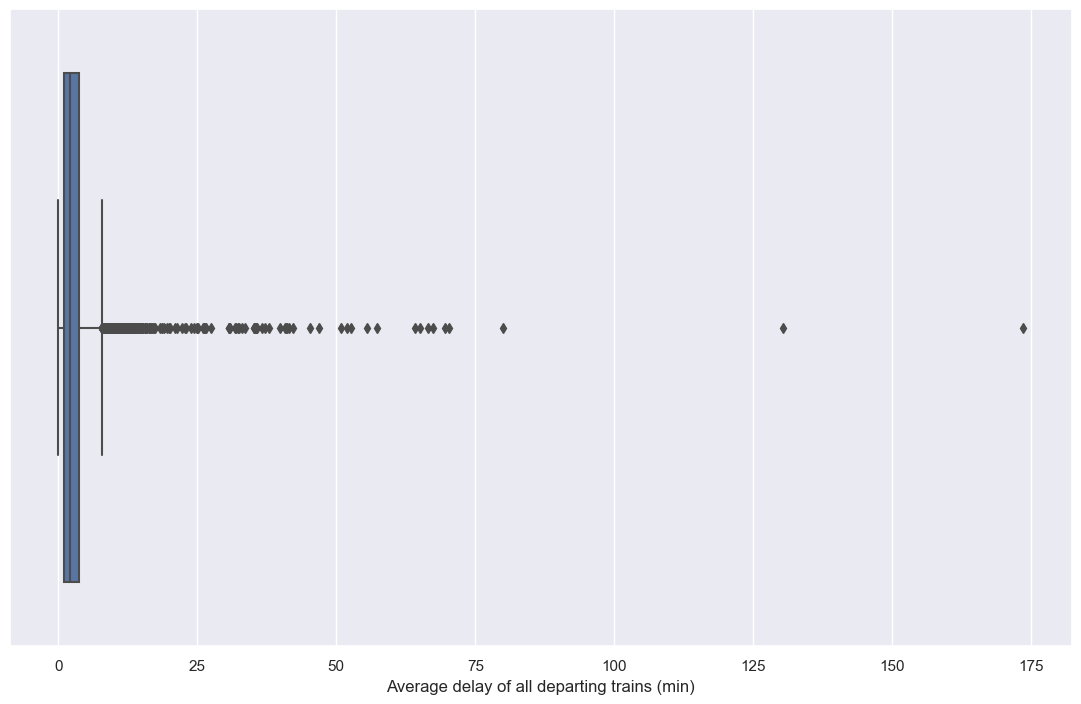

In [197]:
sns.boxplot(data= df_clean, x = 'Average delay of all departing trains (min)')
plt.show

In [198]:
df_clean

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7,ANGOULEME,PARIS MONTPARNASSE,131.914980,247,0,191,3.576353,2.678273,41,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21,32.965873,7,2,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242,0,178,9.780805,7.033609,47,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35,32.057143,14,2,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7,LE MANS,PARIS MONTPARNASSE,62.395349,435,5,391,3.896974,3.529341,91,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30,42.367241,13,4,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7,ST MALO,PARIS MONTPARNASSE,172.421053,114,0,101,1.950990,1.685673,15,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8,27.620833,2,0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404,4,284,8.379108,5.803125,73,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28,37.658333,12,3,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,2020,5,LYON PART DIEU,LILLE,193.436620,87,16,62,4.632527,4.026291,4,21.483333,3.508451,0.000000,0.500000,0.000000,0.250000,0.250000,0.000000,5,36.320833,3,0,2020-05,0.000000,50.000000,0.000000,25.000000,25.000000,0.000000
7800,2020,5,AIX EN PROVENCE TGV,PARIS LYON,188.161074,166,17,128,2.875781,2.434340,6,28.358333,0.310738,0.500000,0.166667,0.166667,0.000000,0.166667,0.000000,6,28.358333,3,0,2020-05,50.000000,16.666667,16.666667,0.000000,16.666667,0.000000
7801,2020,5,PARIS LYON,AVIGNON TGV,162.702381,191,23,50,5.359667,1.201190,11,37.110606,2.020933,0.272727,0.181818,0.090909,0.363636,0.090909,0.000000,8,46.264583,4,1,2020-05,27.272727,18.181818,9.090909,36.363636,9.090909,0.000000
7802,2020,5,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227,28,54,5.702160,1.125963,10,49.050000,3.657203,0.300000,0.300000,0.100000,0.300000,0.000000,0.000000,10,49.050000,6,1,2020-05,30.000000,30.000000,10.000000,30.000000,0.000000,0.000000


#### Outliners

In [199]:
dc.lower_treshholders(df_clean)

Column: Year
Lower treshold 2011.5
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Month
Lower treshold -6.0
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Average travel time (min)
Lower treshold -61.936525261
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Number of expected circulations
Lower treshold -130.5
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Number of cancelled trains
Lower treshold -9.0
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Number of late trains at departure
Lower treshold -98.5
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Average delay of late departing trains (min)
Lower treshold -8.569389907700003
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Average delay of all departing trains (min)
Lower treshold -2.9792246308812507
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Number of trains late on arrival
Lower treshold -31.0
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Average delay of late arriving trains 

In [200]:
dc.upper_treshholders(df_clean)

Column: Year
Upper treshold 2023.5
Ilosc wartosci powyzej górnego outlinera: 0

Column: Month
Upper treshold 18.0
Ilosc wartosci powyzej górnego outlinera: 0

Column: Average travel time (min)
Upper treshold 371.23060604700004
Ilosc wartosci powyzej górnego outlinera: 111

Column: Number of expected circulations
Upper treshold 673.5
Ilosc wartosci powyzej górnego outlinera: 77

Column: Number of cancelled trains
Upper treshold 15.0
Ilosc wartosci powyzej górnego outlinera: 850

Column: Number of late trains at departure
Upper treshold 201.5
Ilosc wartosci powyzej górnego outlinera: 498

Column: Average delay of late departing trains (min)
Upper treshold 35.33761954314001
Ilosc wartosci powyzej górnego outlinera: 216

Column: Average delay of all departing trains (min)
Upper treshold 7.873664227528751
Ilosc wartosci powyzej górnego outlinera: 425

Column: Number of trains late on arrival
Upper treshold 97.0
Ilosc wartosci powyzej górnego outlinera: 355

Column: Average delay of late arr

##### Check outliners with remove option

In [201]:
df_clean_after_remove = dc.remove_outliners(df_clean)

<function matplotlib.pyplot.show(close=None, block=None)>

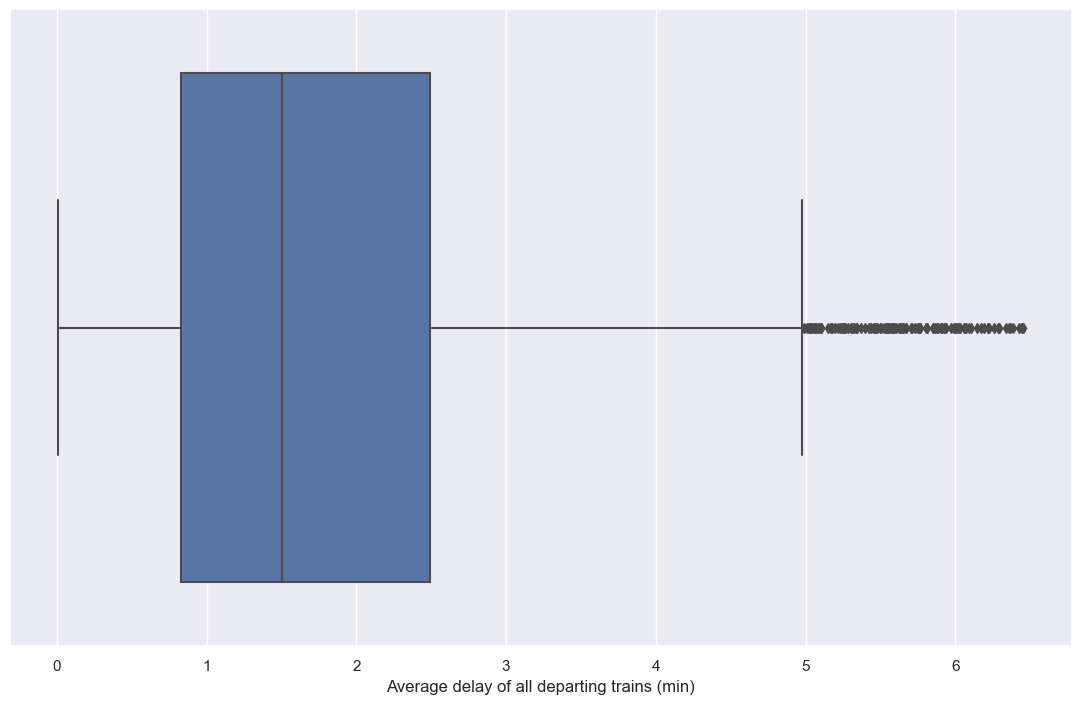

In [202]:
sns.boxplot(data= df_clean_after_remove, x = 'Average delay of all departing trains (min)')
plt.show

In [203]:
len(df_clean_after_remove)

3559

##### Check outliners after replace with median

In [204]:
condition = df_clean['Average delay of all departing trains (min)'] > 35.33761954314001
median_value = df_clean['Average delay of all departing trains (min)'].median()

df_check_replace = df_clean.copy()

df_check_replace.loc[condition, 'Average delay of all departing trains (min)'] = median_value

<function matplotlib.pyplot.show(close=None, block=None)>

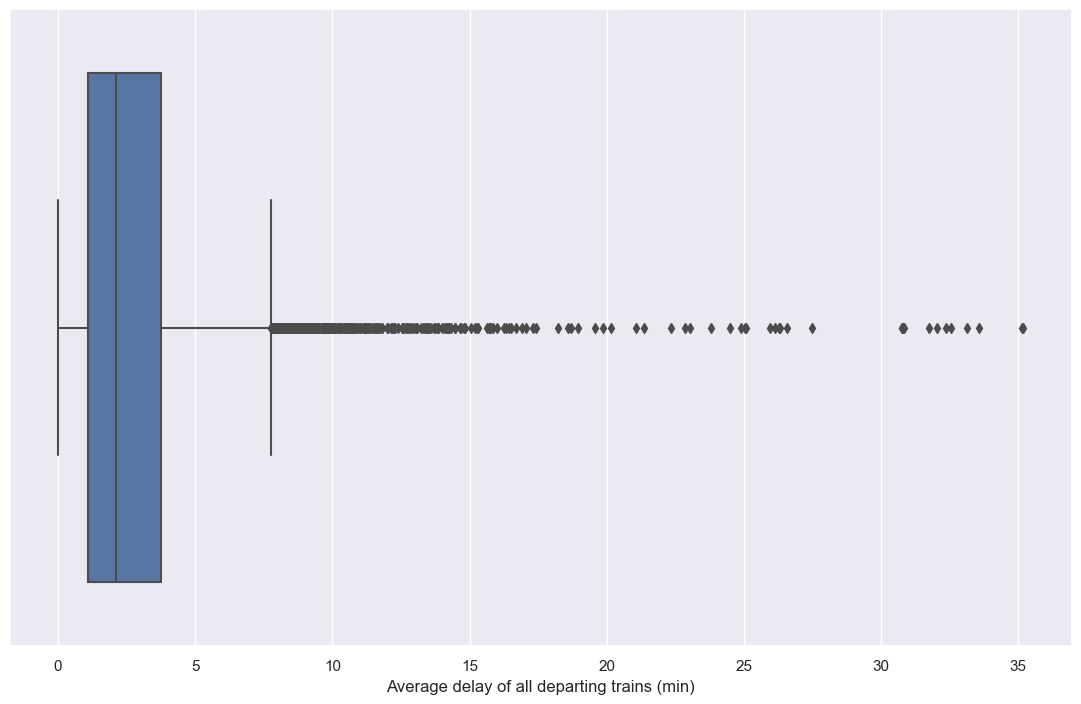

In [205]:
sns.boxplot(data= df_check_replace, x = 'Average delay of all departing trains (min)')
plt.show

In [206]:
len(df_check_replace)

7278

##### Check outliners with iteration removing

In [207]:
df_remove_iteration = df_clean.copy()

In [208]:
while True:
    initial_len = len(df_remove_iteration)
    df_remove_iteration = dc.remove_outliners(df_remove_iteration)
    if len(df_remove_iteration) == initial_len:
        break

<function matplotlib.pyplot.show(close=None, block=None)>

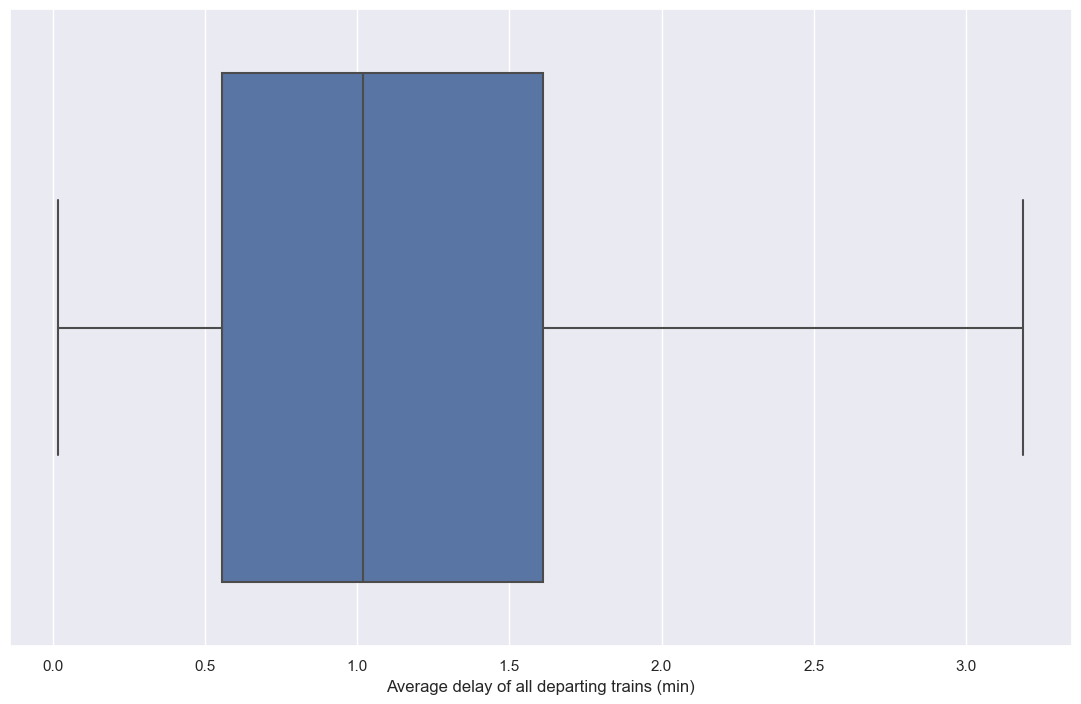

In [209]:
sns.boxplot(data= df_remove_iteration, x = 'Average delay of all departing trains (min)')
plt.show

In [210]:
len(df_remove_iteration)

1209

##### Best option how to handle outliners ?

In [211]:
df_clean.reset_index(drop= True)

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7,ANGOULEME,PARIS MONTPARNASSE,131.914980,247,0,191,3.576353,2.678273,41,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21,32.965873,7,2,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242,0,178,9.780805,7.033609,47,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35,32.057143,14,2,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7,LE MANS,PARIS MONTPARNASSE,62.395349,435,5,391,3.896974,3.529341,91,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30,42.367241,13,4,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7,ST MALO,PARIS MONTPARNASSE,172.421053,114,0,101,1.950990,1.685673,15,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8,27.620833,2,0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404,4,284,8.379108,5.803125,73,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28,37.658333,12,3,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7273,2020,5,LYON PART DIEU,LILLE,193.436620,87,16,62,4.632527,4.026291,4,21.483333,3.508451,0.000000,0.500000,0.000000,0.250000,0.250000,0.000000,5,36.320833,3,0,2020-05,0.000000,50.000000,0.000000,25.000000,25.000000,0.000000
7274,2020,5,AIX EN PROVENCE TGV,PARIS LYON,188.161074,166,17,128,2.875781,2.434340,6,28.358333,0.310738,0.500000,0.166667,0.166667,0.000000,0.166667,0.000000,6,28.358333,3,0,2020-05,50.000000,16.666667,16.666667,0.000000,16.666667,0.000000
7275,2020,5,PARIS LYON,AVIGNON TGV,162.702381,191,23,50,5.359667,1.201190,11,37.110606,2.020933,0.272727,0.181818,0.090909,0.363636,0.090909,0.000000,8,46.264583,4,1,2020-05,27.272727,18.181818,9.090909,36.363636,9.090909,0.000000
7276,2020,5,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227,28,54,5.702160,1.125963,10,49.050000,3.657203,0.300000,0.300000,0.100000,0.300000,0.000000,0.000000,10,49.050000,6,1,2020-05,30.000000,30.000000,10.000000,30.000000,0.000000,0.000000


### Feature Enginering

In [212]:
df_clean.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7,ANGOULEME,PARIS MONTPARNASSE,131.914980,247,0,191,3.576353,2.678273,41,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21,32.965873,7,2,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242,0,178,9.780805,7.033609,47,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35,32.057143,14,2,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7,LE MANS,PARIS MONTPARNASSE,62.395349,435,5,391,3.896974,3.529341,91,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30,42.367241,13,4,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7,ST MALO,PARIS MONTPARNASSE,172.421053,114,0,101,1.950990,1.685673,15,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8,27.620833,2,0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404,4,284,8.379108,5.803125,73,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28,37.658333,12,3,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


#### Add Line Columns

In [213]:
df_clean['Train Line'] = df_clean['Departure station'] + "-" + df_clean['Arrival station']

#### Add "due to" columns

In [214]:
df_clean['All reasons delay'] = df_clean['Delay due to external causes']\
+ df_clean['Delay due to railway infrastructure']\
+ df_clean['Delay due to rolling stock']\
+ df_clean['Delay due to station management and reuse of material']\
+ df_clean['Delay due to traffic management']\
+ df_clean['Delay due to travellers taken into account']\



In [215]:
df_clean.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account,Train Line,All reasons delay
0,2019,7,ANGOULEME,PARIS MONTPARNASSE,131.914980,247,0,191,3.576353,2.678273,41,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21,32.965873,7,2,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000,ANGOULEME-PARIS MONTPARNASSE,100.0
1,2019,7,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242,0,178,9.780805,7.033609,47,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35,32.057143,14,2,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444,PARIS MONTPARNASSE-LA ROCHELLE VILLE,100.0
2,2019,7,LE MANS,PARIS MONTPARNASSE,62.395349,435,5,391,3.896974,3.529341,91,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30,42.367241,13,4,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941,LE MANS-PARIS MONTPARNASSE,100.0
3,2019,7,ST MALO,PARIS MONTPARNASSE,172.421053,114,0,101,1.950990,1.685673,15,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8,27.620833,2,0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308,ST MALO-PARIS MONTPARNASSE,100.0
4,2019,7,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404,4,284,8.379108,5.803125,73,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28,37.658333,12,3,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385,PARIS MONTPARNASSE-ST PIERRE DES CORPS,100.0


In [216]:
df_clean['Average delay of late arriving trains (min)'].describe()

count    7278.000000
mean       32.981337
std        13.625678
min         8.118182
25%        24.167117
50%        31.089749
75%        39.413286
max       258.000000
Name: Average delay of late arriving trains (min), dtype: float64

#### Set categories for new column

In [217]:
categories_labels = ['Small', 'Medium', 'High', 'Very High']
quantiles = np.quantile(df_clean['Average delay of late arriving trains (min)'], [0.25, 0.5, 0.75])

In [218]:
small = df_clean[df_clean['Average delay of late arriving trains (min)'] <= quantiles[0]]
medium = df_clean[(df_clean['Average delay of late arriving trains (min)'] > quantiles[0]) & (df_clean['Average delay of late arriving trains (min)'] <= quantiles[1])]
high = df_clean[(df_clean['Average delay of late arriving trains (min)'] > quantiles[1]) & (df_clean['Average delay of late arriving trains (min)'] <= quantiles[2])]
very_high = df_clean[df_clean['Average delay of late arriving trains (min)'] > quantiles[2]]

In [219]:
df_clean['Delay Label'] = np.nan
if not small.empty:
    df_clean.loc[small.index, 'Delay Label'] = categories_labels[0]
if not medium.empty:
    df_clean.loc[medium.index, 'Delay Label'] = categories_labels[1]
if not high.empty:
    df_clean.loc[high.index, 'Delay Label'] = categories_labels[2]
if not very_high.empty:
    df_clean.loc[very_high.index, 'Delay Label'] = categories_labels[3]

C:\Users\magdz\AppData\Local\Temp\ipykernel_22208\1603835684.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Small' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_clean.loc[small.index, 'Delay Label'] = categories_labels[0]


In [220]:
df_clean['Delay Label'] = pd.Categorical(df_clean['Delay Label'], categories=categories_labels, ordered=True)

In [221]:
df_clean['Delay Label'].dtype

CategoricalDtype(categories=['Small', 'Medium', 'High', 'Very High'], ordered=True, categories_dtype=object)

In [222]:
df_clean['Delay Label'].value_counts()

Delay Label
Small        1820
Very High    1820
Medium       1819
High         1819
Name: count, dtype: int64

In [223]:
df_clean.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account,Train Line,All reasons delay,Delay Label
0,2019,7,ANGOULEME,PARIS MONTPARNASSE,131.914980,247,0,191,3.576353,2.678273,41,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21,32.965873,7,2,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000,ANGOULEME-PARIS MONTPARNASSE,100.0,Small
1,2019,7,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242,0,178,9.780805,7.033609,47,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35,32.057143,14,2,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444,PARIS MONTPARNASSE-LA ROCHELLE VILLE,100.0,Medium
2,2019,7,LE MANS,PARIS MONTPARNASSE,62.395349,435,5,391,3.896974,3.529341,91,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30,42.367241,13,4,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941,LE MANS-PARIS MONTPARNASSE,100.0,Small
3,2019,7,ST MALO,PARIS MONTPARNASSE,172.421053,114,0,101,1.950990,1.685673,15,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8,27.620833,2,0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308,ST MALO-PARIS MONTPARNASSE,100.0,Small
4,2019,7,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404,4,284,8.379108,5.803125,73,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28,37.658333,12,3,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385,PARIS MONTPARNASSE-ST PIERRE DES CORPS,100.0,Small


In [224]:
df_clean.groupby('Train Line')['Number of expected circulations'].agg('mean')

Train Line
AIX EN PROVENCE TGV-PARIS LYON          391.015385
ANGERS SAINT LAUD-PARIS MONTPARNASSE    416.560606
ANGOULEME-PARIS MONTPARNASSE            289.215385
ANNECY-PARIS LYON                       168.770492
ARRAS-PARIS NORD                        305.311475
                                           ...    
TOURCOING-MARSEILLE ST CHARLES           27.375000
TOURS-PARIS MONTPARNASSE                181.655738
VALENCE ALIXAN TGV-PARIS LYON           269.625000
VANNES-PARIS MONTPARNASSE               234.446154
ZURICH-PARIS LYON                       141.509091
Name: Number of expected circulations, Length: 130, dtype: float64

#### Number of circulations without cancelled trains

In [225]:
df_clean['Circulations'] = df_clean['Number of expected circulations'] - df_clean['Number of cancelled trains']

In [226]:
df_clean.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account,Train Line,All reasons delay,Delay Label,Circulations
0,2019,7,ANGOULEME,PARIS MONTPARNASSE,131.914980,247,0,191,3.576353,2.678273,41,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21,32.965873,7,2,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000,ANGOULEME-PARIS MONTPARNASSE,100.0,Small,247
1,2019,7,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242,0,178,9.780805,7.033609,47,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35,32.057143,14,2,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444,PARIS MONTPARNASSE-LA ROCHELLE VILLE,100.0,Medium,242
2,2019,7,LE MANS,PARIS MONTPARNASSE,62.395349,435,5,391,3.896974,3.529341,91,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30,42.367241,13,4,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941,LE MANS-PARIS MONTPARNASSE,100.0,Small,430
3,2019,7,ST MALO,PARIS MONTPARNASSE,172.421053,114,0,101,1.950990,1.685673,15,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8,27.620833,2,0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308,ST MALO-PARIS MONTPARNASSE,100.0,Small,114
4,2019,7,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404,4,284,8.379108,5.803125,73,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28,37.658333,12,3,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385,PARIS MONTPARNASSE-ST PIERRE DES CORPS,100.0,Small,400


#### Mean number of circulations

In [227]:
mean_circu = df_clean['Circulations'].mean()
print(f'Mean number of circulations: {mean_circu}')

Mean number of circulations: 264.8366309425666


In [228]:
df_clean = df_clean[df_clean['Circulations']>= mean_circu]

In [229]:
df_clean.shape

(2933, 34)

In [230]:
df_clean.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account,Train Line,All reasons delay,Delay Label,Circulations
2,2019,7,LE MANS,PARIS MONTPARNASSE,62.395349,435,5,391,3.896974,3.529341,91,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30,42.367241,13,4,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941,LE MANS-PARIS MONTPARNASSE,100.0,Small,430
4,2019,7,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404,4,284,8.379108,5.803125,73,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28,37.658333,12,3,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385,PARIS MONTPARNASSE-ST PIERRE DES CORPS,100.0,Small,400
7,2019,7,PARIS EST,METZ,85.399381,323,0,239,10.278452,7.552477,52,37.144872,5.523633,0.240000,0.180000,0.160000,0.260000,0.160000,0.000000,28,60.874405,16,11,2019-07,24.000000,18.000000,16.000000,26.000000,16.000000,0.000000,PARIS EST-METZ,100.0,High,323
17,2019,7,PARIS LYON,LYON PART DIEU,120.473684,549,17,173,9.601541,2.774875,64,29.921094,4.437563,0.133333,0.200000,0.100000,0.483333,0.083333,0.000000,46,39.127037,24,10,2019-07,13.333333,20.000000,10.000000,48.333333,8.333333,0.000000,PARIS LYON-LYON PART DIEU,100.0,Medium,532
18,2019,7,LYON PART DIEU,PARIS LYON,121.107914,597,41,470,4.696773,3.941876,110,25.861970,6.519005,0.186916,0.280374,0.205607,0.121495,0.158879,0.046729,74,33.632420,30,8,2019-07,18.691589,28.037383,20.560748,12.149533,15.887850,4.672897,LYON PART DIEU-PARIS LYON,100.0,Medium,556


#### Top 10 train lines for weight mean by Ave. all delay and Ave. late delay

In [231]:
weight_all = df_clean.groupby('Train Line').apply(dc.weight_average, 'Average delay of all arriving trains (min)')

top_10_all = weight_all.sort_values(ascending= False).head(10)

top_10_all_lines = top_10_all.index.tolist()

top_10_all_lines

['PERPIGNAN-PARIS LYON',
 'PARIS LYON-NICE VILLE',
 'NICE VILLE-PARIS LYON',
 'LYON PART DIEU-LILLE',
 'LYON PART DIEU-MARNE LA VALLEE',
 'MARNE LA VALLEE-MARSEILLE ST CHARLES',
 'PARIS LYON-TOULON',
 'MARSEILLE ST CHARLES-MARNE LA VALLEE',
 'TOULON-PARIS LYON',
 'LYON PART DIEU-MARSEILLE ST CHARLES']

In [232]:
weight_late = df_clean.groupby('Train Line').apply(dc.weight_average, 'Average delay of late arriving trains (min)')

top_10_late = weight_late.sort_values(ascending= False).head(10)

top_10_late_lines = top_10_late.index.to_list()

top_10_late_lines

['PERPIGNAN-PARIS LYON',
 'PARIS LYON-NICE VILLE',
 'NICE VILLE-PARIS LYON',
 'TOULON-PARIS LYON',
 'MONTPELLIER-PARIS LYON',
 'PARIS LYON-TOULON',
 'MARNE LA VALLEE-MARSEILLE ST CHARLES',
 'MARSEILLE ST CHARLES-PARIS LYON',
 'MARSEILLE ST CHARLES-MARNE LA VALLEE',
 'PARIS LYON-MONTPELLIER']

In [233]:
df_clean['Train Line'].value_counts()

Train Line
PARIS MONTPARNASSE-BORDEAUX ST JEAN     65
LE MANS-PARIS MONTPARNASSE              63
NANTES-PARIS MONTPARNASSE               63
LYON PART DIEU-PARIS LYON               63
PARIS LYON-MARSEILLE ST CHARLES         63
                                        ..
CHAMBERY CHALLES LES EAUX-PARIS LYON     5
PARIS MONTPARNASSE-VANNES                4
PARIS MONTPARNASSE-QUIMPER               3
DUNKERQUE-PARIS NORD                     1
PERPIGNAN-PARIS LYON                     1
Name: count, Length: 68, dtype: int64

In [234]:
df_all = df_clean[df_clean['Train Line'].isin(top_10_all_lines)]

In [235]:
df_late = df_clean[df_clean['Train Line'].isin(top_10_late_lines)]

In [236]:
df_clean.shape

(2933, 34)

In [237]:
df_late['Train Line'].value_counts()

Train Line
MARSEILLE ST CHARLES-PARIS LYON         63
MONTPELLIER-PARIS LYON                  56
PARIS LYON-MONTPELLIER                  43
TOULON-PARIS LYON                       28
PARIS LYON-TOULON                       17
MARNE LA VALLEE-MARSEILLE ST CHARLES    13
MARSEILLE ST CHARLES-MARNE LA VALLEE     9
PARIS LYON-NICE VILLE                    9
NICE VILLE-PARIS LYON                    7
PERPIGNAN-PARIS LYON                     1
Name: count, dtype: int64

In [238]:
df_all['Train Line'].value_counts()

Train Line
LYON PART DIEU-MARSEILLE ST CHARLES     61
LYON PART DIEU-LILLE                    33
TOULON-PARIS LYON                       28
PARIS LYON-TOULON                       17
MARNE LA VALLEE-MARSEILLE ST CHARLES    13
MARSEILLE ST CHARLES-MARNE LA VALLEE     9
PARIS LYON-NICE VILLE                    9
NICE VILLE-PARIS LYON                    7
LYON PART DIEU-MARNE LA VALLEE           6
PERPIGNAN-PARIS LYON                     1
Name: count, dtype: int64

### Analysis

1. średnie opóźnienie wszystkich przyjazdów pociągów w różnych okresach i na różnych trasach.

2. procentowy udział różnych przyczyn opóźnień, takich jak warunki pogodowe, problemy z infrastrukturą kolejową, zarządzanie ruchem czy problemy z taborami kolejowymi.

3. trendy opóźnień w różnych okresach (miesiącach, latach) oraz na różnych trasach kolejowych

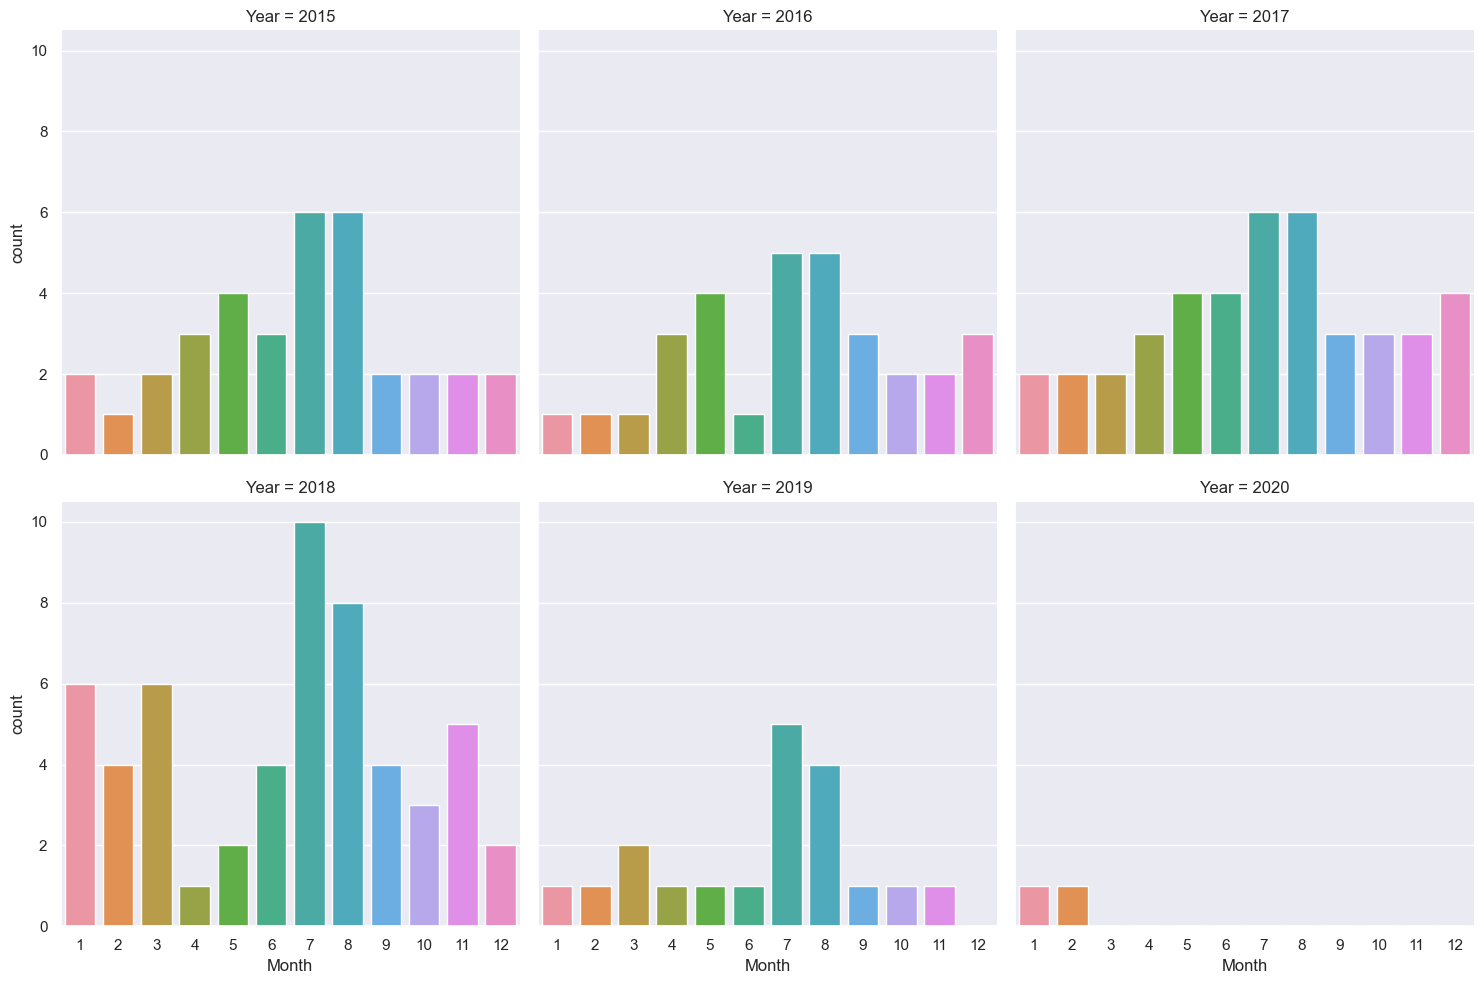

In [239]:
sns.catplot(data = df_all, x = 'Month', col= 'Year', col_wrap = 3, kind= 'count')
pass

4. Identyfikacja tras kolejowych, na których opóźnienia są najczęstsze i najdłuższe, co może pomóc w podejmowaniu działań naprawczych.

5. jak różne czynniki, takie jak warunki pogodowe, infrastruktura kolejowa czy zarządzanie ruchem, wpływają na opóźnienia pociągów.

6. sklasyfikowanie opóźnien na podstawie ich przyczyn i analizować, które czynniki mają największy wpływ na różne kategorie opóźnień

In [240]:
df['Year'].value_counts()

Year
2018    1533
2019    1445
2016    1314
2015    1285
2017    1270
2020     620
Name: count, dtype: int64